# Table of Contents
 <p><div class="lev1"><a href="#常微分方程式-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>常微分方程式</a></div><div class="lev2"><a href="#Euler法-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Euler法</a></div><div class="lev2"><a href="#Heun法-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Heun法</a></div>

# 常微分方程式

## Euler法

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

In [4]:
def Euler(dx=lambda x,t:x, xInit=1.0, n=5, a=0, b=1, trueFunction=np.exp, truePrint=True):
    '''
    常微分方程式 x'(t) = f(x(t),t) を解く。
    dx:x'(t), xInit:初期値x_0, n:分点数(n-1:区間数), 区間[a,b] を離散化
    trueFunction: 真の解を与える関数(truePrintの値がTrueのとき、真の解をプロットし誤差を出力)
    '''
    
    t = np.linspace(a,b,n) #区間をn個の分点で離散化
    h = (b-a)/(n-1) #ステップ幅
    x = np.zeros(n) #xを初期化
    fig, ax = plt.subplots()
    
    #近似解を構成
    x[0] = xInit
    for i in range(n-1):
        x[i+1] = x[i] + h*dx(x[i],t[i])
    ax.plot(t, x, linewidth=2, label=r'$\tilde{x}$' + "(n = {0})".format(n))
    
    #真の解
    if truePrint == True:
        true = np.zeros(n)
        for i in range(n):
            true[i] = trueFunction(t[i])
        ax.plot(t, true, linewidth=2, label='true')
    
        #誤差をプリント
        for i in range(n):
            if n >= 10: #nが10より大きい場合は全体の約1/10進むたびに誤差を出力。
                m = int(n/10)
                if i%m == 0:
                    print ("t = {0:.3f}における誤差は{1}".format(t[i], true[i] - x[i]))
            else:
                print ("t = {0:.3f}における誤差は{1}".format(t[i], true[i] - x[i]))
        print ("t = {0:.3f}における誤差は{1}".format(t[n-1], true[n-1] - x[n-1]))
    
    ax.legend()
    plt.show()

t = 0.000における誤差は0.0
t = 0.250における誤差は0.0340254166877
t = 0.500における誤差は0.0862212707001
t = 0.750における誤差は0.163875016613
t = 1.000における誤差は0.276875578459
t = 1.000における誤差は0.276875578459


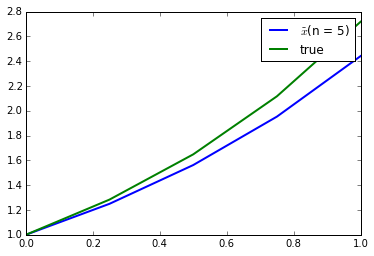

In [15]:
Euler() #タイトルに分割数入れたいんだけど、どうすればよい？

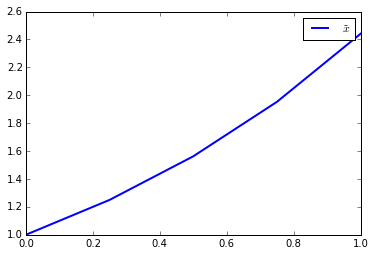

In [85]:
Euler(truePrint=False)

In [10]:
np.linspace(0, 1, 4)

array([ 0.        ,  0.33333333,  0.66666667,  1.        ])

In [32]:
f =lambda x:x**2

In [33]:
f(2)

4

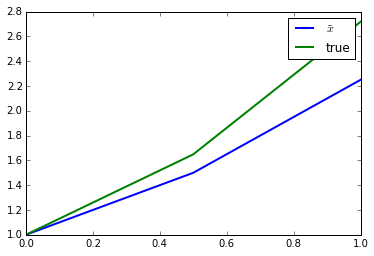

t = 0.000における誤差は0.0
t = 0.500における誤差は0.1487212707
t = 1.000における誤差は0.468281828459


In [57]:
Euler(n=3)

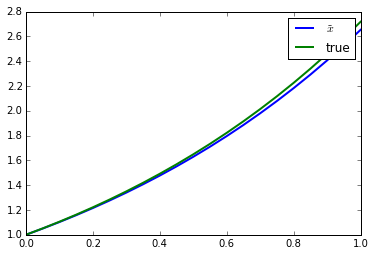

t = 0.000における誤差は0.0
t = 0.250における誤差は0.00774385418774
t = 0.500における誤差は0.0198266439227
t = 0.750における誤差は0.0380718372013
t = 1.000における誤差は0.0649841233146


In [60]:
Euler(n=21)

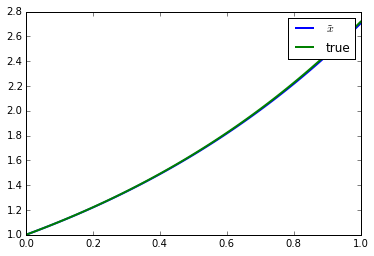

t = 0.000における誤差は0.0
t = 0.050における誤差は0.000261046276024
t = 0.100における誤差は0.000548792664443
t = 0.150における誤差は0.000865287358285
t = 0.200における誤差は0.0012127182122
t = 0.250における誤差は0.00159342167051
t = 0.300における誤差は0.0020098922431
t = 0.350における誤差は0.00246479256199
t = 0.400における誤差は0.00296096405305
t = 0.450における誤差は0.00350143825954
t = 0.500における誤差は0.00408944885625
t = 0.550における誤差は0.0047284443952
t = 0.600における誤差は0.00542210182642
t = 0.650における誤差は0.00617434083955
t = 0.700における誤差は0.00698933907509
t = 0.750における誤差は0.0078715482566
t = 0.800における誤差は0.00882571129821
t = 0.850における誤差は0.00985688044522
t = 0.900における誤差は0.0109704365085
t = 0.950における誤差は0.0121721092571
t = 1.000における誤差は0.0134679990375


In [62]:
Euler(n=101)

t = 0.000における誤差は0.0
t = 0.250における誤差は-0.0307667655237
t = 0.500における誤差は-0.0550030974154
t = 0.750における誤差は-0.065472898011
t = 1.000における誤差は-0.0599732465374


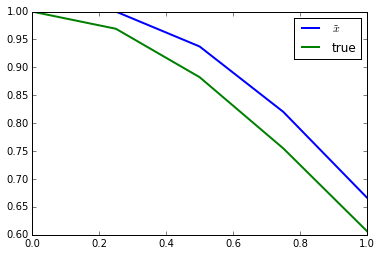

In [86]:
#例8.5
Euler(dx=lambda x,t:-x*t, trueFunction=lambda t:np.exp(-0.5*(t**2)))

t = 0.000における誤差は0.0
t = 0.250における誤差は-0.00598473521116
t = 0.500における誤差は-0.0102953866417
t = 0.750における誤差は-0.0118060514307
t = 1.000における誤差は-0.0104531779586


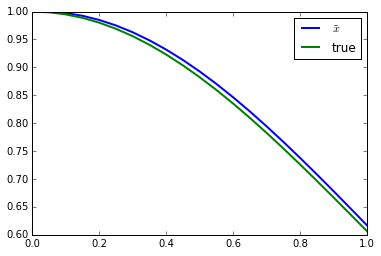

In [90]:
Euler(dx=lambda x,t:-x*t, n=21, trueFunction=lambda t:np.exp(-0.5*(t**2)))

t = 0.000における誤差は0.0
t = 0.050における誤差は-0.000249569025422
t = 0.100における誤差は-0.000496211363642
t = 0.150における誤差は-0.000736862338369
t = 0.200における誤差は-0.000968559625221
t = 0.250における誤差は-0.00118849429235
t = 0.300における誤差は-0.00139405846173
t = 0.350における誤差は-0.00158288855157
t = 0.400における誤差は-0.00175290317896
t = 0.450における誤差は-0.00190233494452
t = 0.500における誤差は-0.00202975548279
t = 0.550における誤差は-0.0021340933385
t = 0.600における誤差は-0.00221464441438
t = 0.650における誤差は-0.00227107492444
t = 0.700における誤差は-0.00230341697333
t = 0.750における誤差は-0.00231205706016
t = 0.800における誤差は-0.00229771797136
t = 0.850における誤差は-0.00226143467461
t = 0.900における誤差は-0.00220452495314
t = 0.950における誤差は-0.00212855562208
t = 1.000における誤差は-0.00203530524464


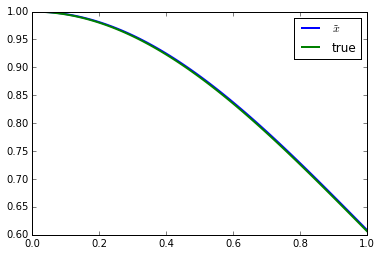

In [89]:
Euler(dx=lambda x,t:-x*t, n=101, trueFunction=lambda t:np.exp(-0.5*(t**2)))

In [5]:
np.pi

3.141592653589793

In [4]:
#eg.8.6
def Euler2(dx=lambda x,y,t:y, dy=lambda x,y,t:-x, xInit=1.0, yInit=0.0, n=5, a=-2*np.pi, b=2*np.pi):
    '''
    連立常微分方程式 x'(t) = f(x(t),y(t),t) and y'(t) = g(x(t),y(t),t) を解く。
    dx:x'(t), dy:y'(t), xInit:初期値x_0,yInit:初期値y_0, n:分点数(n-1:区間数), 区間[a,b] を離散化
    '''
    
    t = np.linspace(a,b,n) #区間をn個の分点で離散化
    h = (b-a)/(n-1) #ステップ幅
    x = np.zeros(n) #xを初期化
    y = np.zeros(n) #yを初期化
    fig, ax = plt.subplots()
    
    #近似解を構成
    x[0] = xInit
    y[0] = yInit
    for i in range(n-1):
        x[i+1] = x[i] + h*dx(x[i],y[i],t[i])
        y[i+1] = y[i] + h*dy(x[i],y[i],t[i])
    ax.plot(t, x, linewidth=2, label=r'$\tilde{x}$')
    ax.plot(t, y, linewidth=2, label=r'$\tilde{y}$')
    
    ax.legend()
    plt.show()

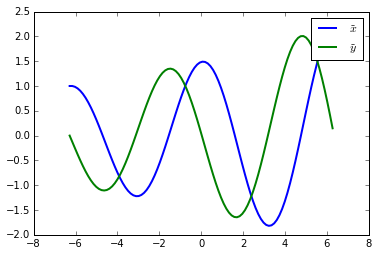

In [9]:
Euler2(n=100)

## Heun法

In [20]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division

In [25]:
def Heun(dx=lambda x,t:x, xInit=1.0, n=5, a=0, b=1, trueFunction=np.exp, truePrint=True):
    '''
    常微分方程式 x'(t) = f(x(t),t) を解く。
    dx:x'(t), xInit:初期値x_0, n:分点数(n-1:区間数), 区間[a,b] を離散化
    trueFunction: 真の解を与える関数(truePrintの値がTrueのとき、真の解をプロットし誤差を出力)
    '''
    
    t = np.linspace(a,b,n) #区間をn個の分点で離散化
    h = (b-a)/(n-1) #ステップ幅
    x = np.zeros(n) #xを初期化
    fig, ax = plt.subplots()
    
    #近似解を構成
    x[0] = xInit
    for i in range(n-1):
        x[i+1] = x[i] + h*dx(x[i],t[i]) #Euler法の近似値
        x[i+1] = x[i] + h*( (dx(x[i],t[i]) + dx(x[i+1],t[i+1])) / 2)  #Heun法の近似値
        #print "x[{0}] = ".format(i+1) + str(x[i+1])
    ax.plot(t, x, linewidth=2, label=r'$\tilde{x}$')
    
    #真の解
    if truePrint == True:
        true = np.zeros(n)
        for i in range(n):
            true[i] = trueFunction(t[i])
        ax.plot(t, true, linewidth=2, label='true')
    
        #誤差をプリント
        for i in range(n):
            if n >= 10: #nが10より大きい場合は全体の約1/10進むたびに誤差を出力。最後の点の誤差も出力。
                m = int(n/10)
                if i%m == 0:
                    print "t = {0:.3f}における誤差は{1}".format(t[i], true[i] - x[i])
            else:
                print "t = {0:.3f}における誤差は{1}".format(t[i], true[i] - x[i])
        
    
    ax.legend()
    plt.show()

t = 0.000における誤差は0.0
t = 0.250における誤差は0.00277541668774
t = 0.500における誤差は0.00711970820013
t = 0.750における誤差は0.0136980146595
t = 1.000における誤差は0.0234261384566


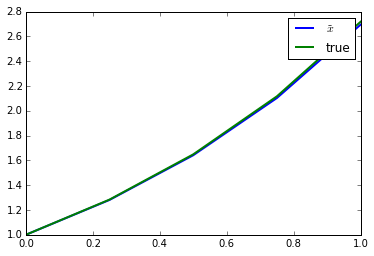

In [13]:
Heun()

t = 0.000における誤差は0.0
t = 0.250における誤差は0.0340254166877
t = 0.500における誤差は0.0862212707001
t = 0.750における誤差は0.163875016613
t = 1.000における誤差は0.276875578459


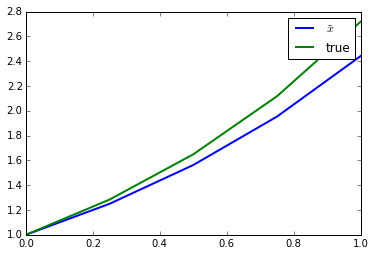

In [9]:
Euler()

t = 0.000における誤差は0.0
t = 0.152における誤差は34.4988260956
t = 0.303における誤差は-1190.16898383
t = 0.455における誤差は41059.4324847
t = 0.606における誤差は-1416502.21008
t = 0.758における誤差は48867663.0371
t = 0.909における誤差は-1685876995.96


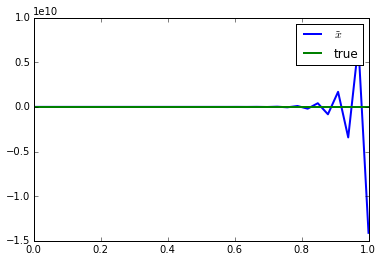

In [15]:
Euler(dx=lambda x,t:-100*x, n=34, trueFunction=lambda t:np.exp(-100*t)) #発散の例

t = 0.000における誤差は0.0
t = 0.100における誤差は1.86801456183e-05
t = 0.200における誤差は1.33031292799e-09
t = 0.300における誤差は7.26836150712e-14
t = 0.400における誤差は3.60552886448e-18
t = 0.501における誤差は1.70953658461e-22
t = 0.601における誤差は7.91758603649e-27
t = 0.701における誤差は3.62013862566e-31
t = 0.801における誤差は1.64328903419e-35
t = 0.901における誤差は7.42855255623e-40
t = 1.000における誤差は3.70269759545e-44


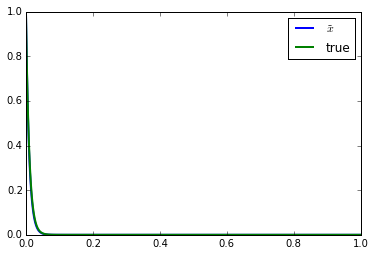

In [30]:
Euler(dx=lambda x,t:-100*x, n=1000, trueFunction=lambda t:np.exp(-100*t)) #発散の例